# Note

In this note, we generate adversarial sample using Deep Fool method.

Deep Fool method:

For a trained model $f = (f_1, \ldots, f_n)$, we take (after sigmoid) argmax to make prediction of $f$. We find solution of $f_i - f_j = 0$ using Newton's method. We take steps toward decreasing $|f_i - f_j|$, that is obtained by $\min (\textrm{norm}(|f_i - f_j|w_i))$ where $w_i$ be the directional unit vector of gradient $\partial f_i / \partial x$ iteratively.

In [2]:
# import necessary packages

import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


print("NumPy Version:", np.__version__)
print("MatplotLib Version:", matplotlib.__version__)
print("Pandas Version:", pd.__version__)

import keras
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.utils import to_categorical

import sys
import os
import glob

sys.path.append(os.path.abspath('../../'))
import cleverhans_modified
from cleverhans_modified.tf2 import attacks
print("CleverHans Version:", cleverhans_modified.__version__)


TensorFlow Version: 2.10.0
NumPy Version: 1.26.0
MatplotLib Version: 3.7.2
Pandas Version: 1.4.3
CleverHans Version: 4.0.0-edc15c6ec93c96562523dc42ae33c9e7


x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
five randomly selected training samples


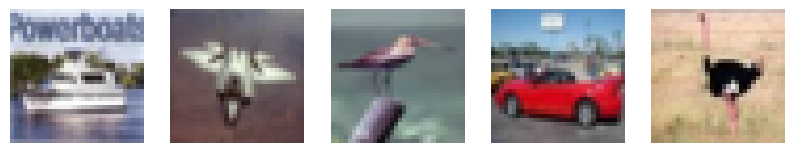

In [3]:
# CIFAR10 preparation

# Load CIFAR-10 dataset
(x, y), (x_test, y_test) = cifar10.load_data()
from sklearn.model_selection import train_test_split
x_train, x_v, y_train, y_v = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_v.shape}")
print(f"x_test shape: {x_test.shape}")

plt.figure(figsize=(10, 5))
print('five randomly selected training samples')
for i,j in enumerate(np.random.choice(40000,5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[j])
    plt.axis('off')
plt.show()

In [4]:
# load models

ResNet56v1 = load_model('../../data/n_9_v1_cifar10.keras')
testing_y = to_categorical(y_test,10)
loss, acc = ResNet56v1.evaluate(x_test, testing_y, verbose=0)
print(f'loss = {loss}, acc = {acc}')

2025-09-03 21:55:06.646058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


loss = 0.6225010752677917, acc = 0.8784999847412109


In [10]:
# Define helper function 
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

def show_images(
    images, 
    preds=None,
    rows : int = 1, 
    title='Images', 
    true_labels=None):
    """
    :param images: List or numpy array of images to display
    :param rows: Number of rows to display. Each row contains 5 figures
    :param preds: List of predicted labels
    :param title: Title of the plot
    :param true_labels: List of true labels
    Display 5*rows images in a row with optional predicted and true labels.
    """
    num_images = min(len(images), 5 * rows)
    fig, axes = plt.subplots(rows, 5, figsize=(12, 3*rows))
    axes = axes.flatten() if rows > 1 else axes
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        pred = np.argmax(preds[i]) if preds is not None else None
        true = np.argmax(true_labels[i]) if true_labels is not None else None

        label_str = ""
        if true_labels is not None:
            label_str += f"T:{class_names[true]}"
        if preds is not None:
            label_str += f"\nP:{class_names[pred]}"
        ax.set_title(label_str)
        ax.axis('off')
    # Hide unused axes
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [11]:
model = ResNet56v1
training_y = to_categorical(y_train,10)

In [12]:
i = 1 # num of rows
n = 5*i # num of figures

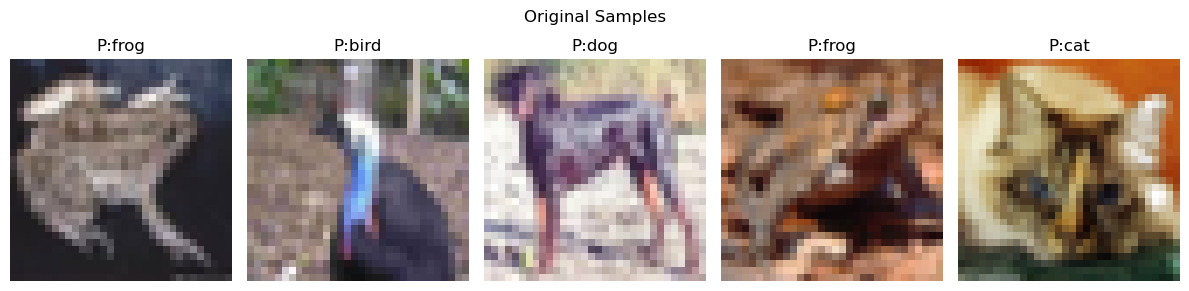

In [13]:
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

## FGM method

1/1 [==============================] - 0s 49ms/step


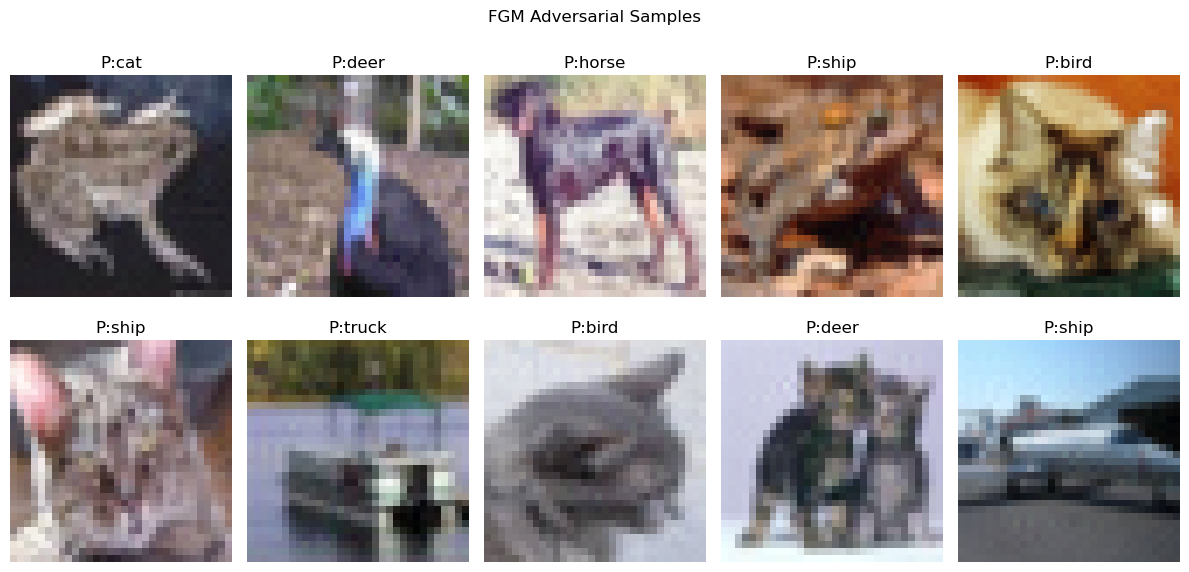

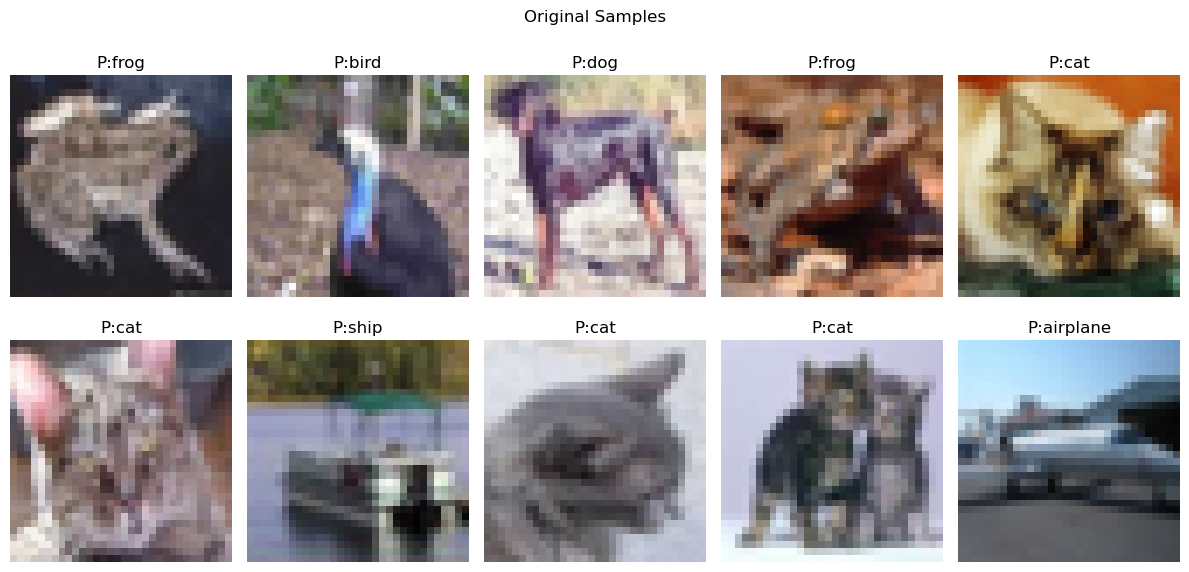

In [20]:
# FGM method. One-step grad direction. 

from cleverhans.tf2.attacks import fast_gradient_method as fgm # 1-step gradient method.
adv_FGM = fgm.fast_gradient_method(model, 
                               x_train[:n], 
                               eps=0.3, norm=2, 
                               clip_max=1.0, clip_min=0.0)
adv_y_FGM = model.predict(adv_FGM)
show_images(adv_FGM, adv_y_FGM, title="FGM Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

### Go further

1/1 [==============================] - 0s 61ms/step
epsilon : 0.5


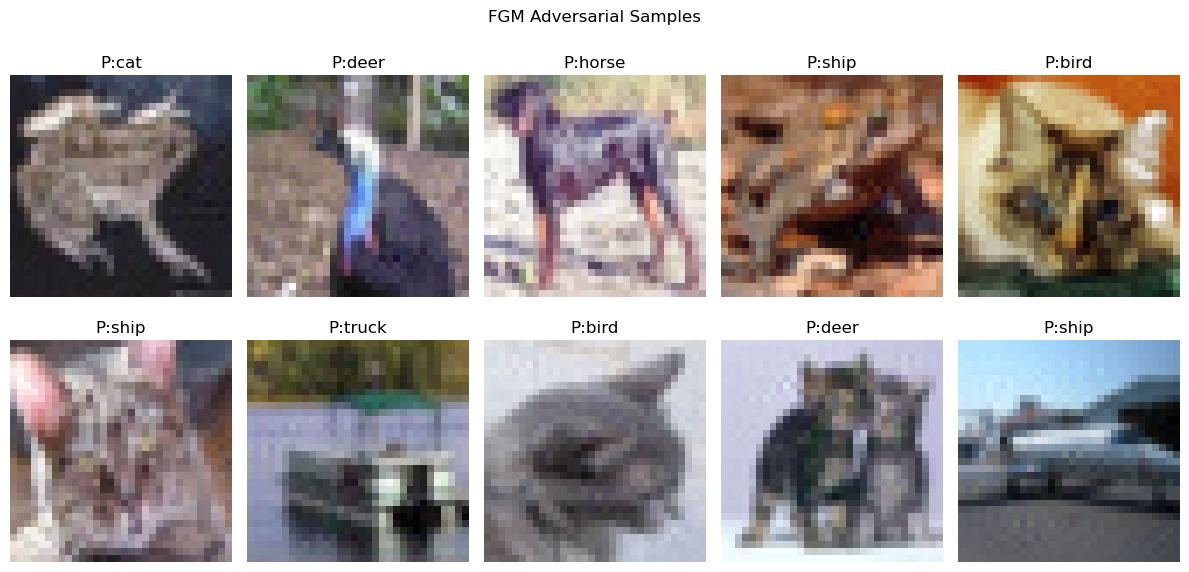

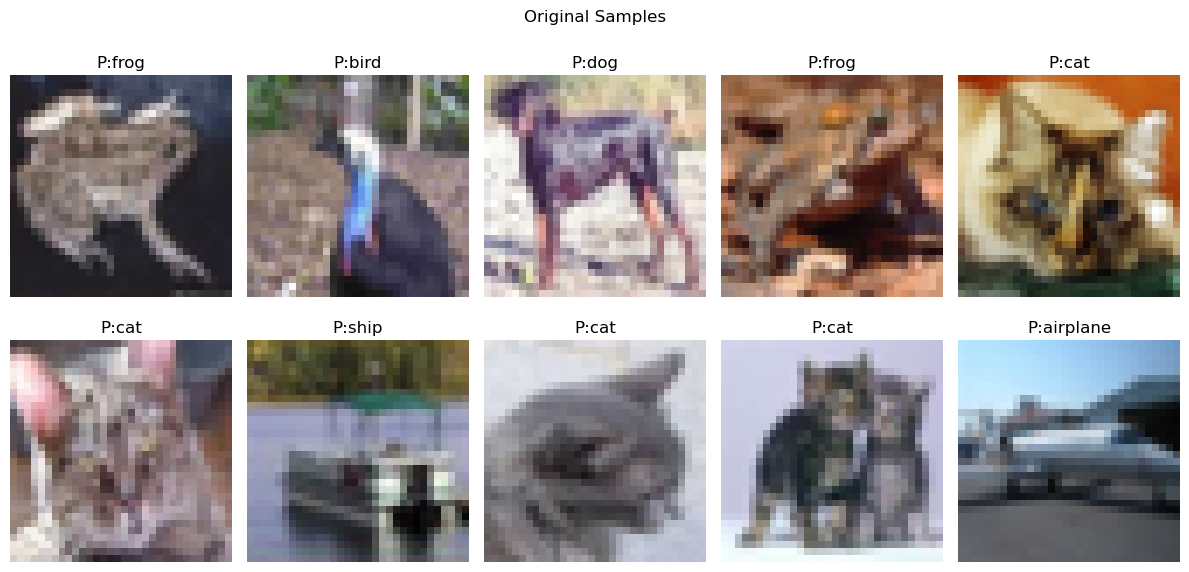

In [18]:
# FGM method. One-step grad direction. 

from cleverhans.tf2.attacks import fast_gradient_method as fgm # 1-step gradient method.
adv_FGM_more = fgm.fast_gradient_method(model, 
                               x_train[:n], 
                               eps=0.5, norm=2, 
                               clip_max=1.0, clip_min=0.0)
adv_y_FGM_more = model.predict(adv_FGM_more)
print('epsilon : 0.5')
show_images(adv_FGM_more, adv_y_FGM_more, title="FGM Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

1/1 [==============================] - 0s 51ms/step
epsilon: 0.8


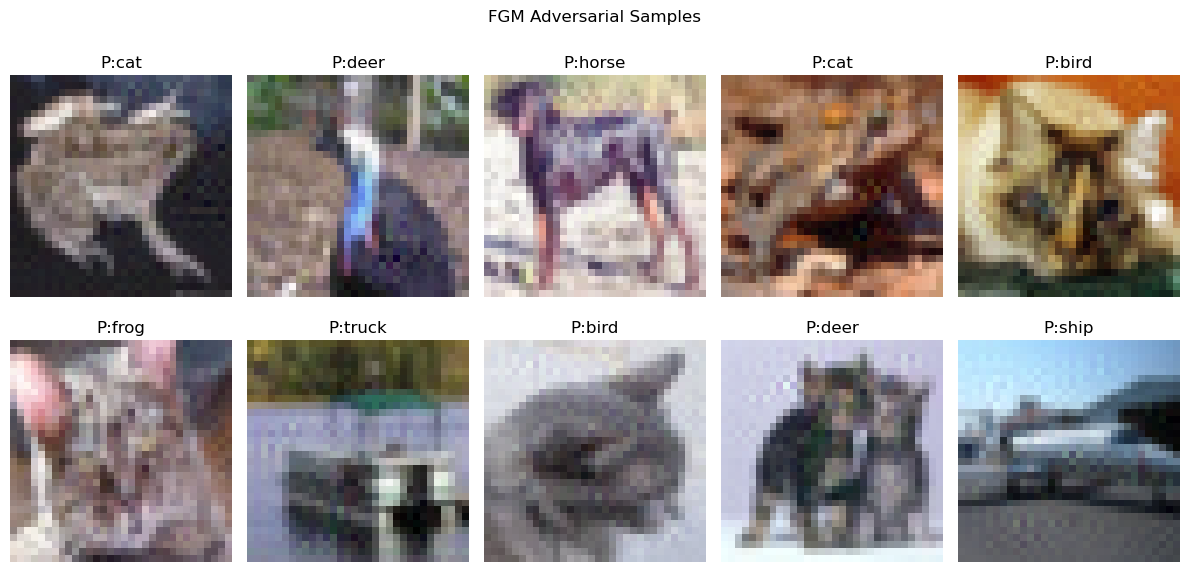

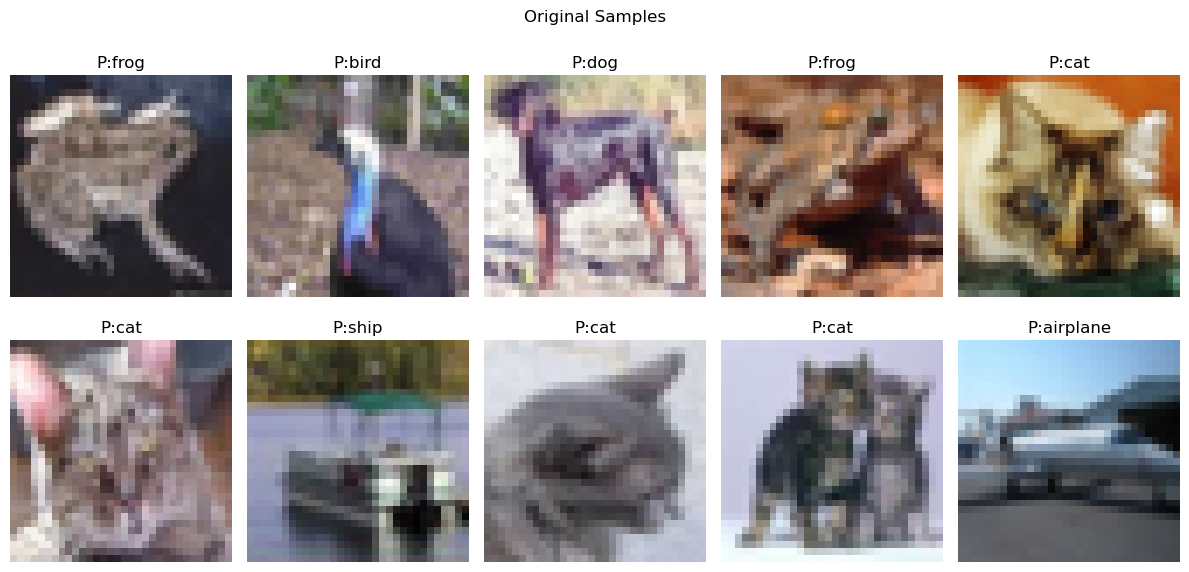

In [19]:
# FGM method. One-step grad direction. 

from cleverhans.tf2.attacks import fast_gradient_method as fgm # 1-step gradient method.
adv_FGM_more = fgm.fast_gradient_method(model, 
                               x_train[:n], 
                               eps=0.8, norm=2, 
                               clip_max=1.0, clip_min=0.0)
adv_y_FGM_more = model.predict(adv_FGM_more)
print('epsilon: 0.8')
show_images(adv_FGM_more, adv_y_FGM_more, title="FGM Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

## PGD method

1/1 [==============================] - 1s 607ms/step


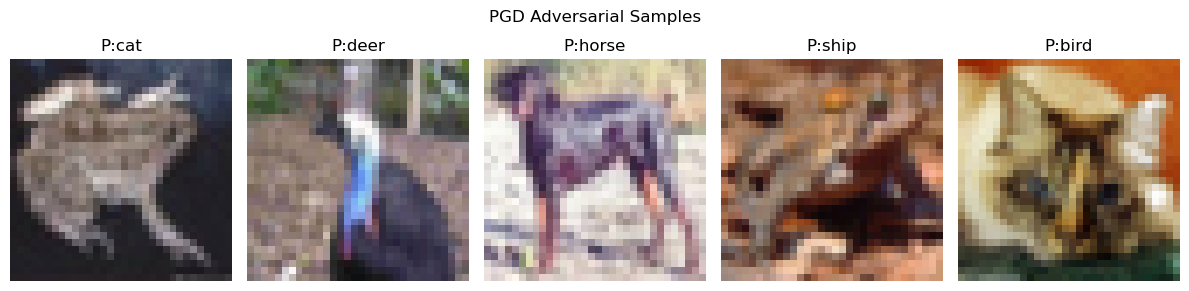

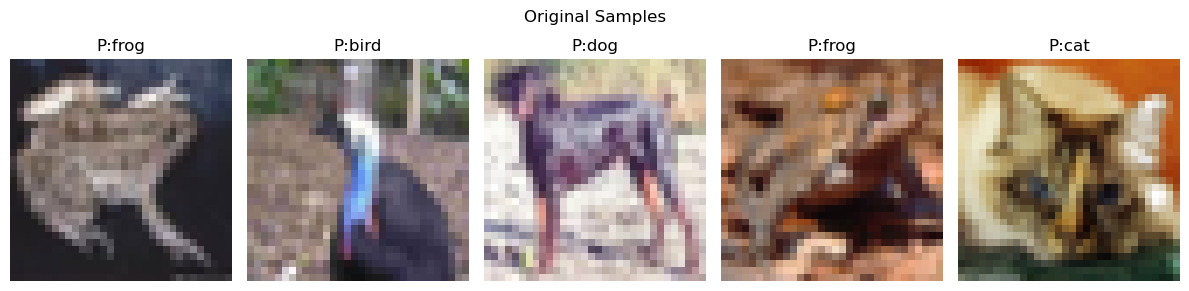

In [14]:
from cleverhans.tf2.attacks import projected_gradient_descent as pgd #iterative version of fgm
adv_PGD = pgd.projected_gradient_descent(model, x_train[:n], 
                                     eps=0.3, eps_iter=0.01, nb_iter=40, norm=2,
                                     clip_max=1.0, clip_min=0.0)
adv_y_PGD = model.predict(adv_PGD)

show_images(adv_PGD, adv_y_PGD, title="PGD Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

### Go further

eps: 0.8470588235294118, eps_iter: 0.3764705882352941
1/1 [==============================] - 0s 36ms/step
num of iterations: 40 -> 500, step_epsilon = 0.01


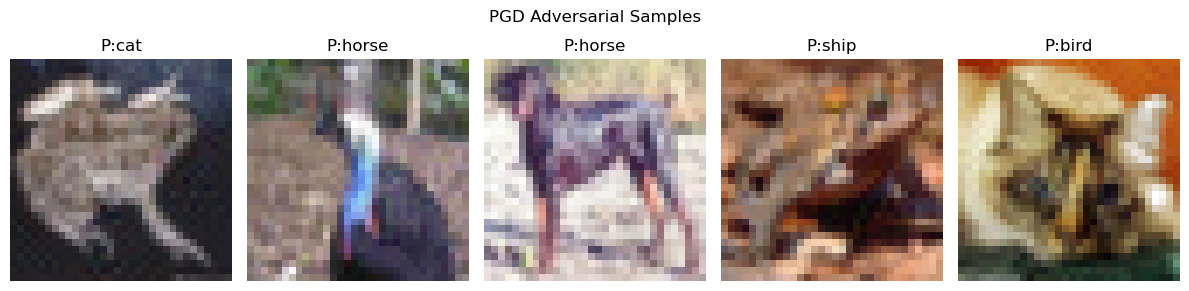

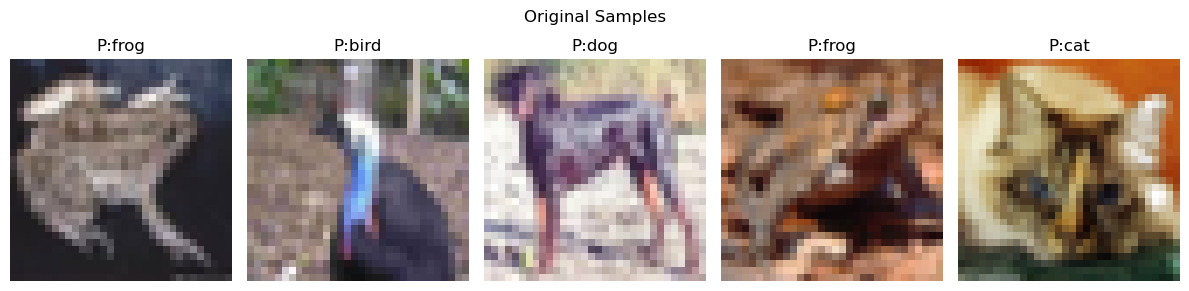

In [15]:
# Config for existing sample
eps = 216/255
eps_iter = 96/255
print(f'eps: {eps}, eps_iter: {eps_iter}')

adv_PGD_more = pgd.projected_gradient_descent(model, x_train[:n], 
                                     eps=eps, eps_iter=eps_iter, nb_iter=500, norm=2,
                                     clip_max=1.0, clip_min=0.0)
adv_y_PGD_more = model.predict(adv_PGD_more)
print('num of iterations: 40 -> 500, step_epsilon = 0.01')
show_images(adv_PGD_more, adv_y_PGD_more, title="PGD Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

eps: 0.8470588235294118, eps_iter: 0.0002
1/1 [==============================] - 0s 36ms/step
num of iterations: 40 -> 500, step_epsilon = 0.01


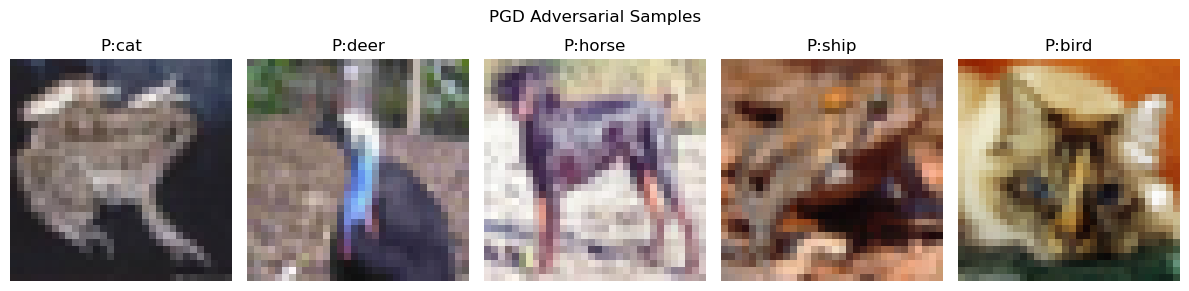

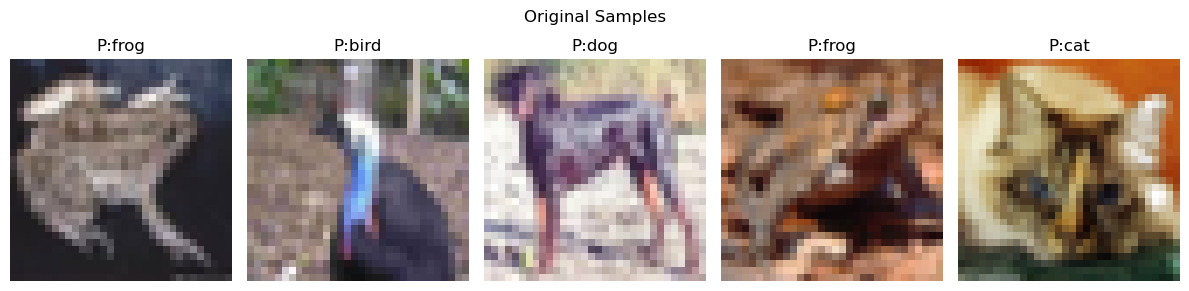

In [ ]:
# Config for existing sample
eps = 216/255
eps_iter = 0.0002
print(f'eps: {eps}, eps_iter: {eps_iter}')

adv_PGD_more = pgd.projected_gradient_descent(model, x_train[:n], 
                                     eps=eps, eps_iter=eps_iter, nb_iter=500, norm=2,
                                     clip_max=1.0, clip_min=0.0)
adv_y_PGD_more = model.predict(adv_PGD_more)
show_images(adv_PGD_more, adv_y_PGD_more, title="PGD Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

1/1 [==============================] - 0s 35ms/step
num of iterations: 40 -> 100, step_epsilon = 0.01, eps: 0.3 -> 216/255


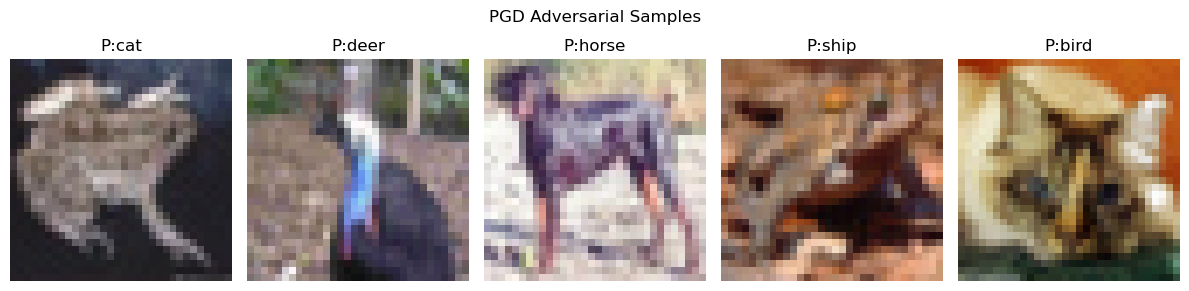

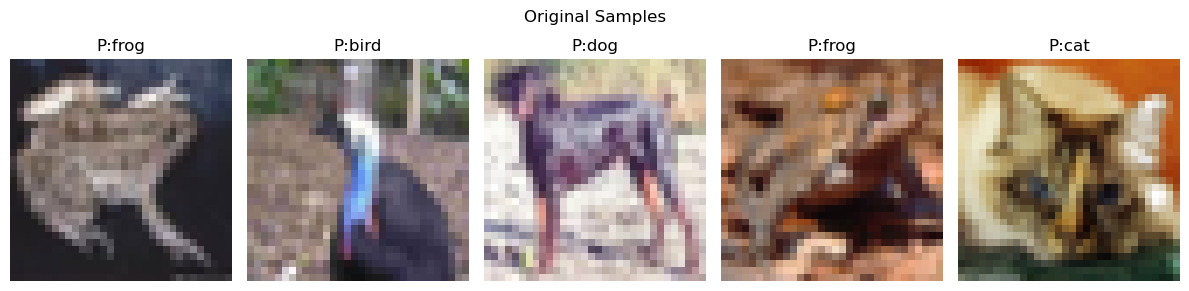

In [ ]:

adv_PGD_more = pgd.projected_gradient_descent(model, x_train[:n], 
                                     eps=216/255, eps_iter=0.1, nb_iter=10, norm=2,
                                     clip_max=1.0, clip_min=0.0)
adv_y_PGD_more = model.predict(adv_PGD_more)
show_images(adv_PGD_more, adv_y_PGD_more, title="PGD Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

1/1 [==============================] - 0s 36ms/step


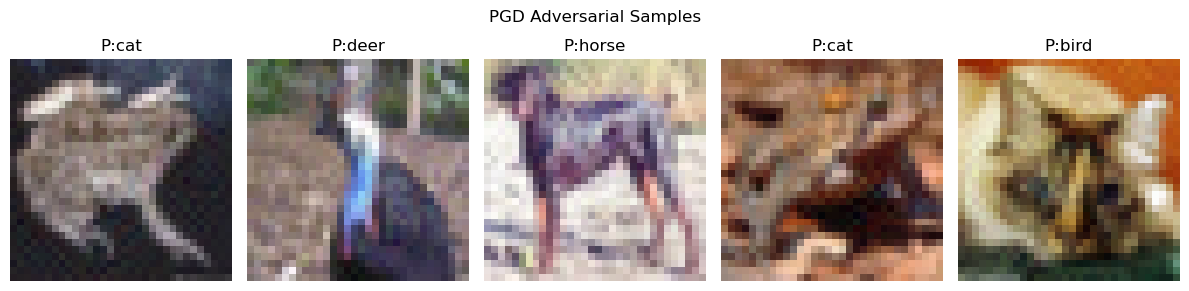

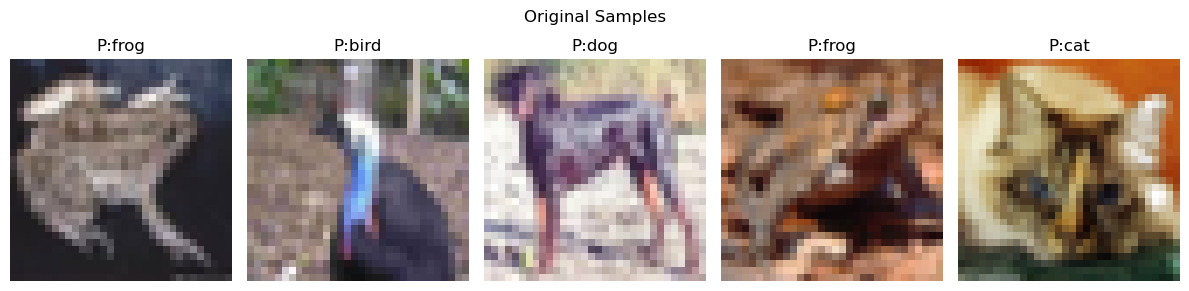

In [18]:

adv_PGD_more = pgd.projected_gradient_descent(model, x_train[:n], 
                                     eps=216/255, eps_iter=0.8, nb_iter=10, norm=2,
                                     clip_max=1.0, clip_min=0.0)
adv_y_PGD_more = model.predict(adv_PGD_more)
show_images(adv_PGD_more, adv_y_PGD_more, title="PGD Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

## CWL2

1/1 [==============================] - 0s 24ms/step


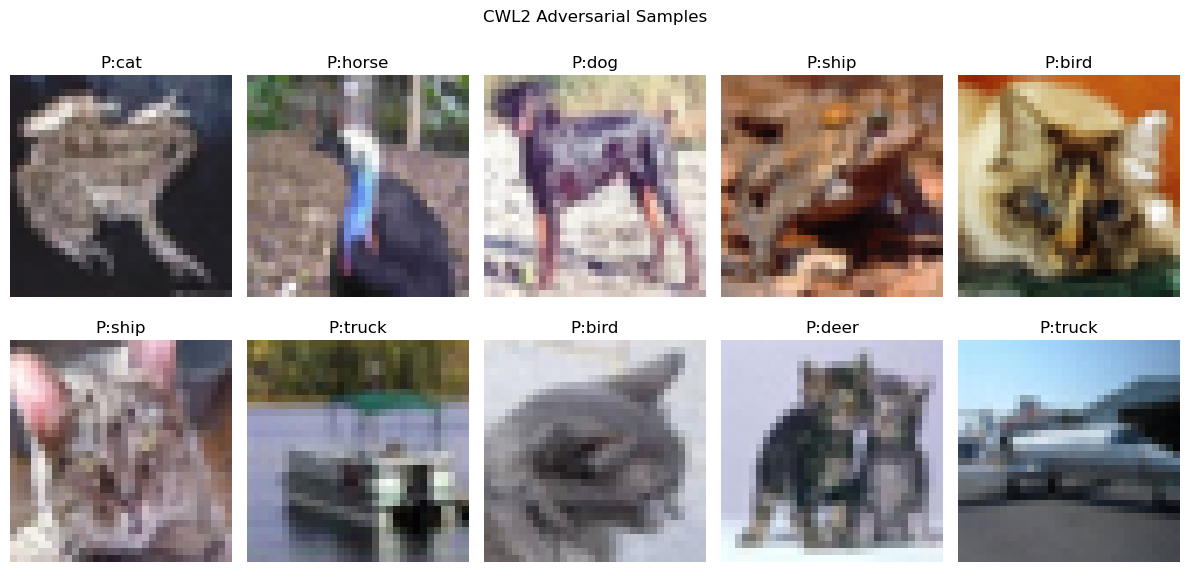

In [27]:
from cleverhans.tf2.attacks import carlini_wagner_l2 as cw # slow and small perturbation
show_adv_x = []
show_adv_y = []
for k in range(n):

    adv_CWL2 = cw.carlini_wagner_l2(model, x_train[k:k+1])
    adv_y_CWL2 = model.predict(adv_CWL2)
    show_adv_x.append(adv_CWL2[0])
    show_adv_y.append(adv_y_CWL2[0])
adv_CWL2 = np.array(show_adv_x)
adv_y_CWL2 = np.array(show_adv_y)
show_images(adv_CWL2, adv_y_CWL2, title="CWL2 Adversarial Samples", rows = i)

## DeepFool

In [7]:
from cleverhans_modified.tf2.attacks import deep_fool

x_adv_deepfool = deep_fool.deepfool(
    model, x_train[:n],
    max_iter=50,
    nb_candidate=10,
    overshoot=0.02,
    clip_min=0.0, clip_max=1.0,
)


1/1 [==============================] - 0s 85ms/step


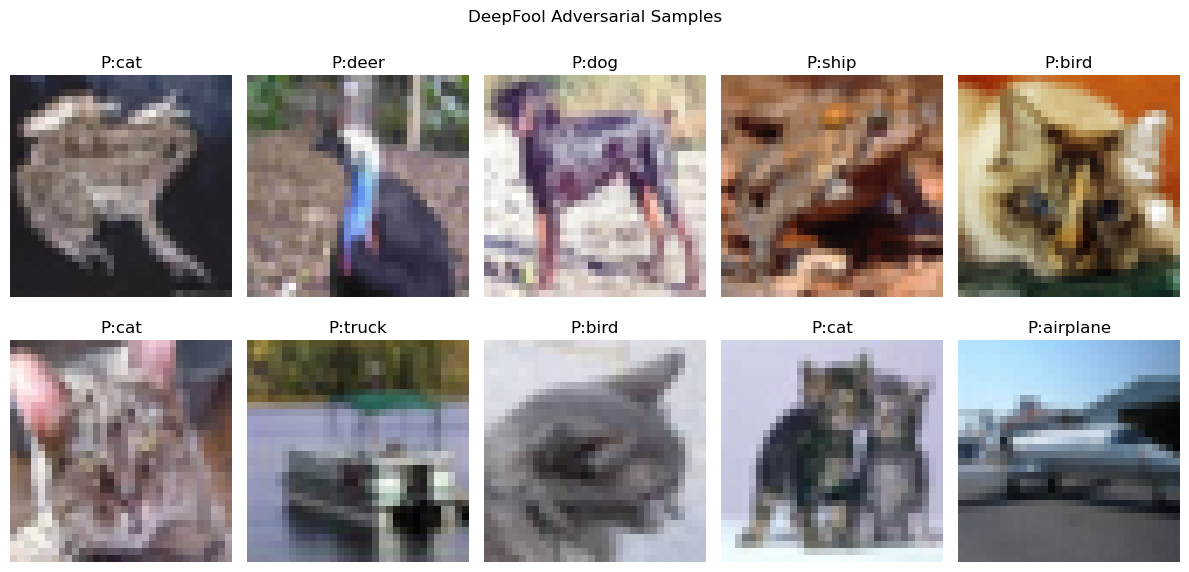

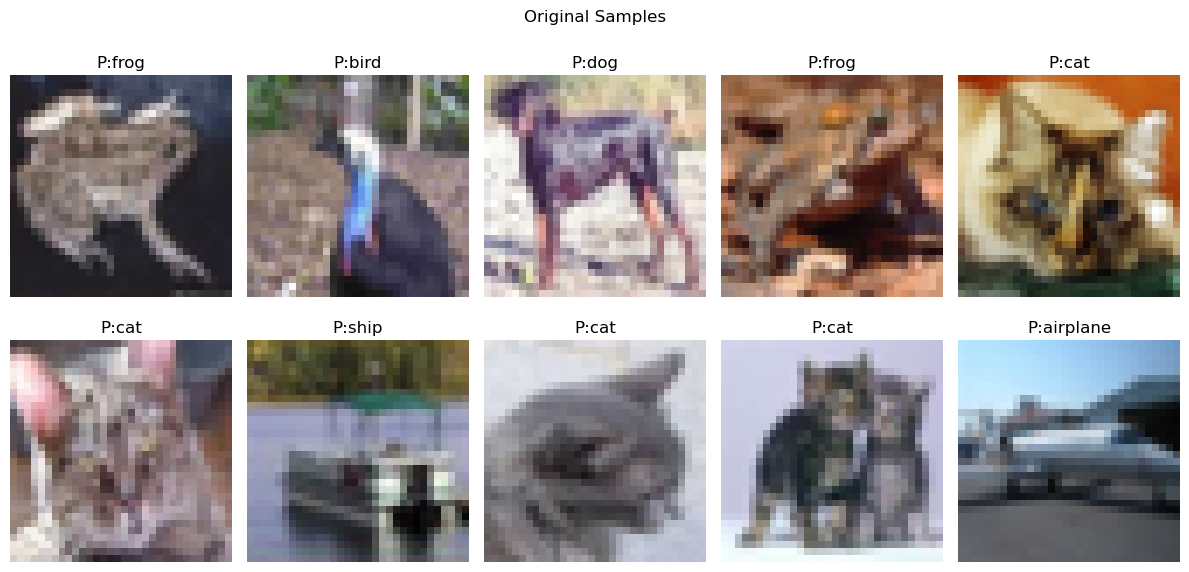

In [28]:

adv_y_deepfool = model.predict(x_adv_deepfool)

show_images(x_adv_deepfool, adv_y_deepfool, title="DeepFool Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)

1/1 [==============================] - 0s 181ms/step


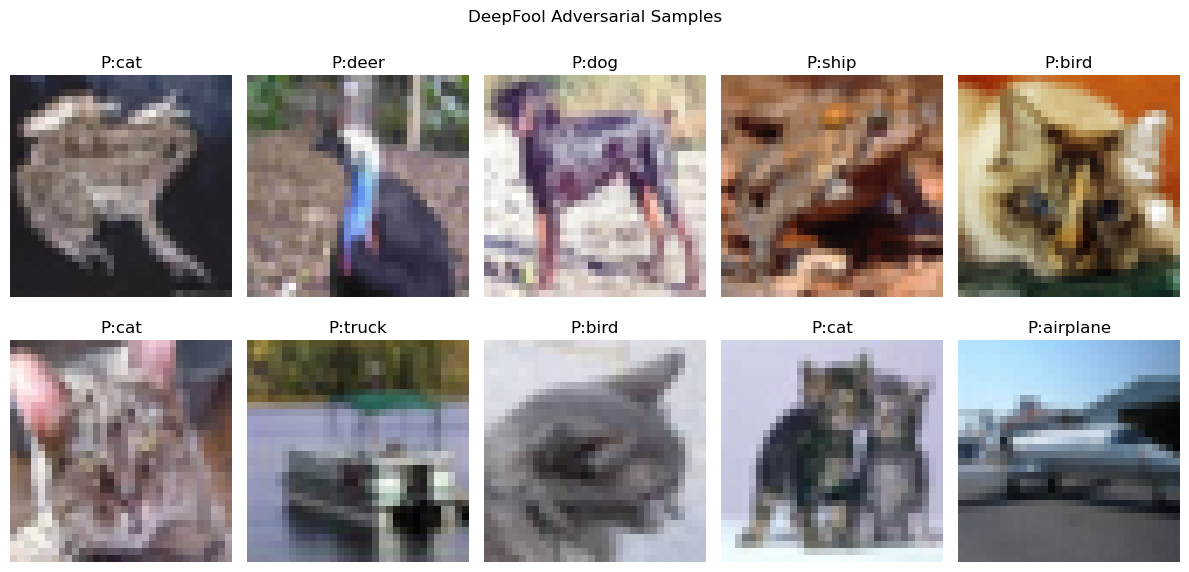

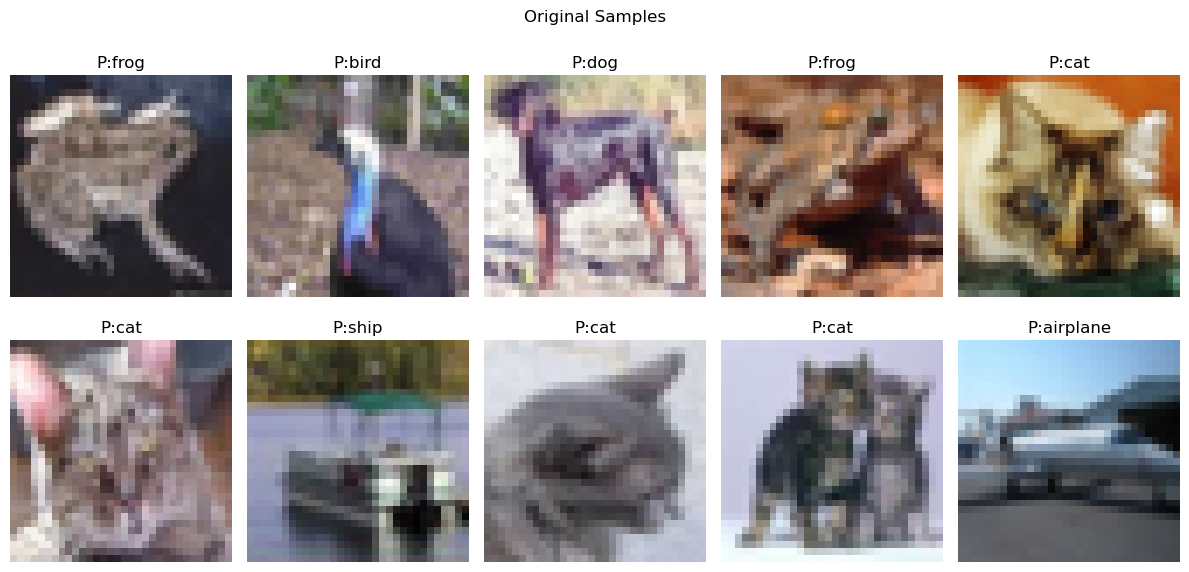

In [29]:
x_adv_deepfool = deep_fool.deepfool(
    model, x_train[:n],
    max_iter=500,
    nb_candidate=10,
    overshoot=0.02,
    clip_min=0.0, clip_max=1.0,
)


adv_y_deepfool = model.predict(x_adv_deepfool)

show_images(x_adv_deepfool, adv_y_deepfool, title="DeepFool Adversarial Samples", rows = i)
show_images(x_train[:n], training_y[:n], title="Original Samples", rows = i)